In [92]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
import seaborn as sns; sns.set()
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [81]:
#oilKorea = pd.read_csv("st_data_oilKorea.tsv", sep='\t')

In [82]:
#oilKorea.to_excel("oilKorea.xlsx")

In [2]:
oilKorea = pd.read_excel("oilKorea.xlsx")

In [4]:
oilKorea.head()

,date,close_val,change_val,change_rate,itemname
0,2015-01-01,1586.62,-5.36,-0.34,휘발유
1,2015-01-04,1576.56,-3.48,-0.22,휘발유
2,2015-01-07,1563.16,-6.54,-0.42,휘발유
3,2015-01-10,1546.58,-6.92,-0.45,휘발유
4,2015-01-13,1531.03,-9.34,-0.61,휘발유


In [5]:
oildata= oilKorea.drop(['itemname'], axis =1 )

In [6]:
oildata.head()

,date,close_val,change_val,change_rate
0,2015-01-01,1586.62,-5.36,-0.34
1,2015-01-04,1576.56,-3.48,-0.22
2,2015-01-07,1563.16,-6.54,-0.42
3,2015-01-10,1546.58,-6.92,-0.45
4,2015-01-13,1531.03,-9.34,-0.61


In [7]:
oildata = oildata.set_index('date')

In [8]:
oildata.head()

,close_val,change_val,change_rate
date,,,
2015-01-01,1586.62,-5.36,-0.34
2015-01-04,1576.56,-3.48,-0.22
2015-01-07,1563.16,-6.54,-0.42
2015-01-10,1546.58,-6.92,-0.45
2015-01-13,1531.03,-9.34,-0.61


In [9]:
oildata["y"] = np.log(oildata["close_val"])
oildata.head()

,close_val,change_val,change_rate,y
date,,,,
2015-01-01,1586.62,-5.36,-0.34,7.369361
2015-01-04,1576.56,-3.48,-0.22,7.363001
2015-01-07,1563.16,-6.54,-0.42,7.354465
2015-01-10,1546.58,-6.92,-0.45,7.343801
2015-01-13,1531.03,-9.34,-0.61,7.333696


In [10]:
oildata = oildata.reset_index()

In [11]:
oildata.head()

,date,close_val,change_val,change_rate,y
0,2015-01-01,1586.62,-5.36,-0.34,7.369361
1,2015-01-04,1576.56,-3.48,-0.22,7.363001
2,2015-01-07,1563.16,-6.54,-0.42,7.354465
3,2015-01-10,1546.58,-6.92,-0.45,7.343801
4,2015-01-13,1531.03,-9.34,-0.61,7.333696


In [12]:
oildata.head()

,date,close_val,change_val,change_rate,y
0,2015-01-01,1586.62,-5.36,-0.34,7.369361
1,2015-01-04,1576.56,-3.48,-0.22,7.363001
2,2015-01-07,1563.16,-6.54,-0.42,7.354465
3,2015-01-10,1546.58,-6.92,-0.45,7.343801
4,2015-01-13,1531.03,-9.34,-0.61,7.333696


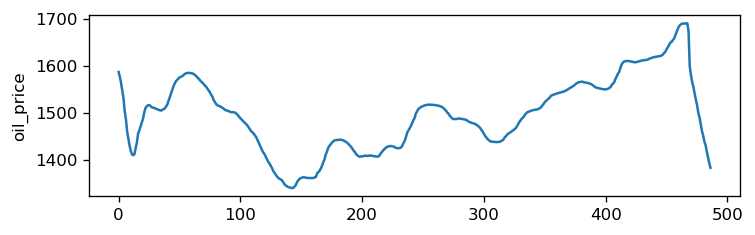

In [91]:
plt.figure(figsize=(7,2))
plt.plot(oildata['close_val'])
plt.ylabel('oil_price')
plt.show()

In [17]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(oildata.close_val.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.538347
p-value: 0.106421


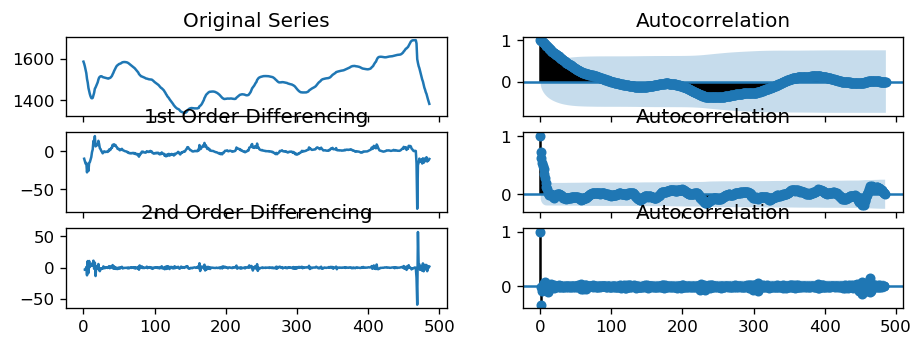

In [39]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(oildata.close_val); axes[0, 0].set_title('Original Series')
plot_acf(oildata.close_val, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(oildata.close_val.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(oildata.close_val.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(oildata.close_val.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(oildata.close_val.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

#d=2

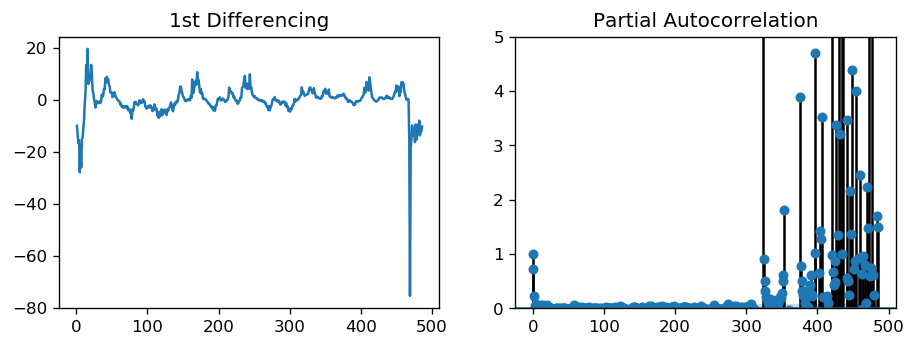

In [19]:
# PACF plot of 1st differenced series d=1
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1,2,sharex=True)
axes[0].plot(oildata.close_val.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(oildata.close_val.diff().dropna(), ax=axes[1])

plt.show()

#p=1

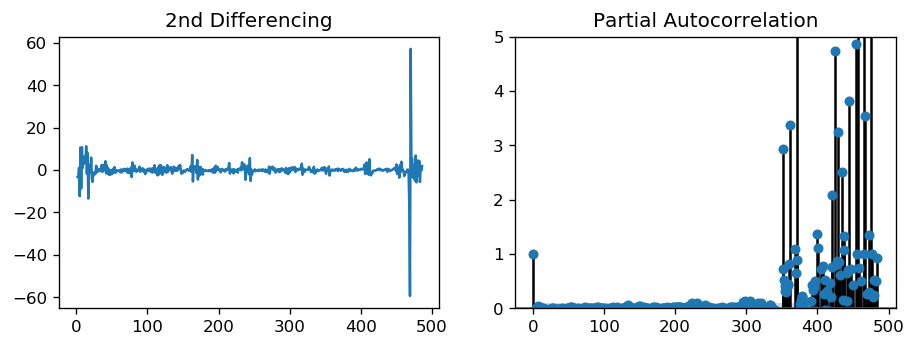

In [43]:
# PACF plot of 1st differenced series d= 2
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1,2,sharex=True)
axes[0].plot(oildata.close_val.diff().diff()); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(oildata.close_val.diff().diff().dropna(), ax=axes[1])

plt.show()

#p=1

In [ ]:
#MA q 결정

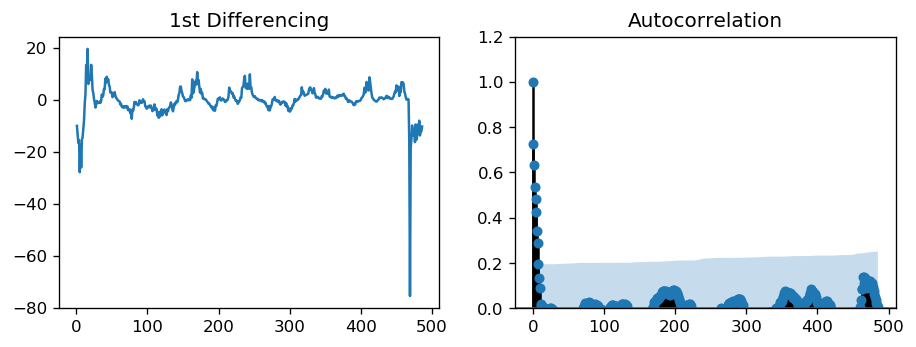

In [56]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(oildata.close_val.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(oildata.close_val.diff().dropna(), ax=axes[1])

plt.show()
#q=8

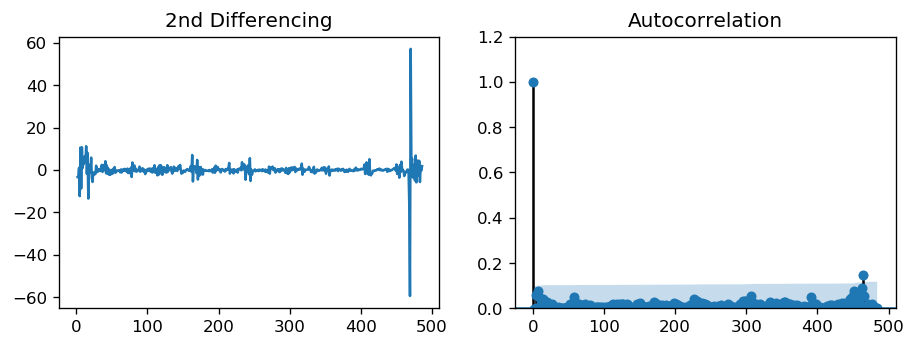

In [41]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(oildata.close_val.diff().diff()); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(oildata.close_val.diff().diff().dropna(), ax=axes[1])

plt.show()
#q=1인데 over differenced -> 2

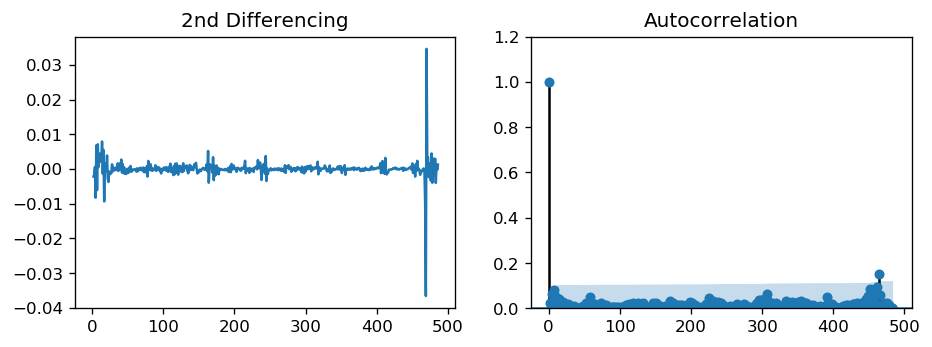

In [57]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(oildata.y.diff().diff()); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(oildata.y.diff().diff().dropna(), ax=axes[1])

plt.show()
#q=1인데 over differenced -> 2

In [61]:
from statsmodels.tsa.arima_model import ARIMA

# 1,2,2 ARIMA Model
model = ARIMA(oildata.close_val, order=(1,2,2))
model_fit = model.fit(trend = 'nc', disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D2.close_val   No. Observations:                  485
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -1352.034
Method:                       css-mle   S.D. of innovations              3.916
Date:                Sat, 11 May 2019   AIC                           2712.069
Time:                        09:07:53   BIC                           2728.805
Sample:                             2   HQIC                          2718.645
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
ar.L1.D2.close_val     0.8917      0.029     30.925      0.000       0.835       0.948
ma.L1.D2.close_val    -1.3486      0.058    -23.384      0.000      -1.462      -1.236
ma.L2.D2.close_val  

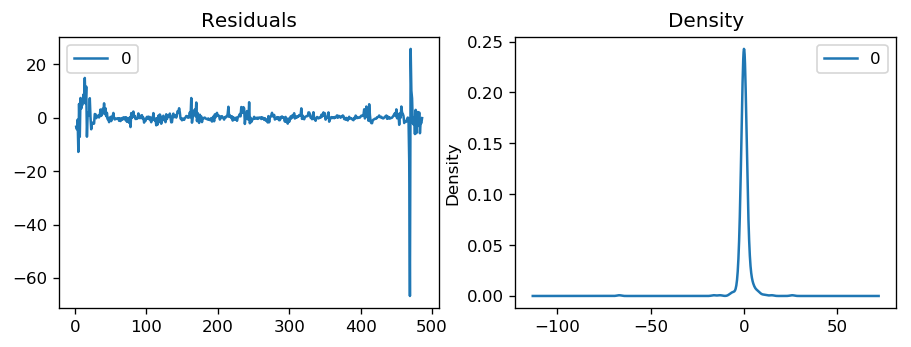

In [66]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

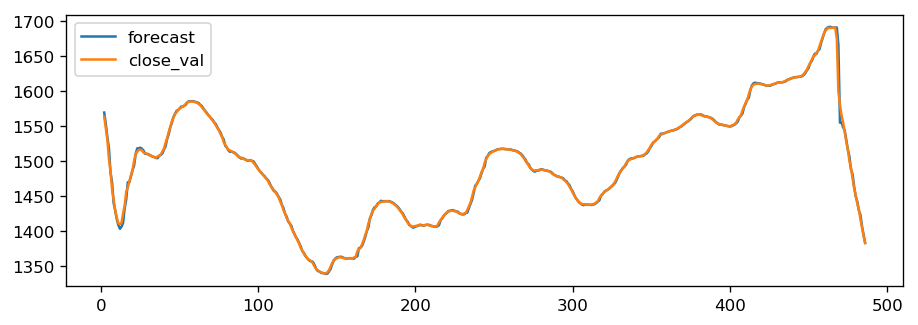

In [69]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [150]:
oildata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 5 columns):
date           487 non-null object
close_val      487 non-null float64
change_val     483 non-null float64
change_rate    446 non-null float64
y              487 non-null float64
dtypes: float64(4), object(1)
memory usage: 19.1+ KB


In [70]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = oildata.close_val[:365]
test = oildata.close_val[365:]

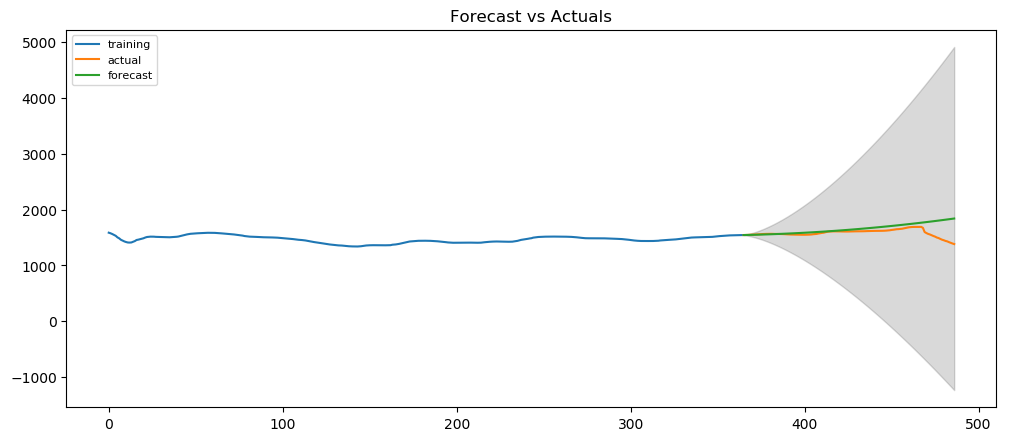

In [73]:
# Build Model 
model = ARIMA(train, order=(1, 2, 2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(122, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [75]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'mape': 0.050200281095513354,
 'me': 74.77791484032389,
 'mae': 76.37131269828005,
 'mpe': 0.04917965230914655,
 'rmse': 133.26513982359052,
 'acf1': 0.9448800963912989,
 'corr': -0.06413043446259668,
 'minmax': 0.04349189737018333}

In [83]:
fore = model_fit.forecast(steps=30)
print(fore)

(array([1373.97097178, 1365.9360713 , 1358.80952039, 1352.48862967,
       1346.88231885, 1341.90980431, 1337.49943506, 1333.58766029,
       1330.11811364, 1327.04080099, 1324.3113801 , 1321.89052163,
       1319.74334243, 1317.83890293, 1316.14976128, 1314.65157795,
       1313.32276501, 1312.14417504, 1311.09882527, 1310.17165281,
       1309.34929768, 1308.6199102 , 1307.97298036, 1307.39918625,
       1306.89025987, 1306.43886787, 1306.03850596, 1305.68340517,
       1305.3684487 , 1305.08909823]), array([ 3.91395259,  7.19699111, 10.70530632, 14.37750141, 18.15189213,
       21.98076717, 25.82840108, 29.66819955, 33.48043028, 37.25054352,
       40.96793501, 44.62502583, 48.21656917, 51.73912183, 55.19063722,
       58.57014914, 61.87752451, 65.11326886, 68.27837288, 71.37419085,
       74.40234433, 77.36464579, 80.26303804, 83.09954638, 85.87624087,
       88.59520676, 91.25852148, 93.86823685, 96.4263656 , 98.93487127]), array([[1366.29976567, 1381.6421779 ],
       [1351.83022